### 写在前面：大数据能否改变足球比赛？
#### 作者：带球小弟
不管你喜不喜欢，足球比赛转播中都会播报比赛双方的各项数据统计，包括控球率、射门次数、角球次数、传球次数、越位次数等等。事实上，足球比赛已经全方位地拥抱了数据。教练会用数据分析软件来准备比赛，球迷会用比赛数据统计来探讨比赛，球探会用球员数据系统来挖掘球员。抛开一切，对于足球比赛本身大家最关心的也就是比分，进球数和球队积分，这些通通都是数据，只是现在的数据类型更加丰富和复杂了。

在这一大数据和人工智能时代，数据的重要性已经被广泛接受。事实上，数据已经被用来改变体育比赛了。最著名的案例发生在棒球，最后还被拍成了电影《点球成金》。很多人相信同样的事情也会发生在足球，这其中就包括了本人。

然而，面对数据，也有很多人感到的不是希望，而是焦虑。我很难去说这样的人一定是保守的。原因有以下两点。

首先，数据本身往往太过复杂而令人难以理解。任何想要通过直接阅读数据来理解数据的尝试都很困难。

其次，想要从数据中得到结论也没有想象中那么简单。这里要对数据分析泼盆冷水，降低一下你对数据分析的期待：数据分析并不一定能给出令人满意的答案，即使有大数据也不行。事实上，大数据在某种程度上来说并没有使得分析变得更加简单，反而是增加了困难。原因在于，很多情况下大数据带来的不是更多的信息，而是更多的“噪音”。如果没有合适的工具和方法论，要想从“噪音”中提取有效信息其实更加困难。

要化解上述困难，需要我们能够正确地对待数据和数据分析。对待数据，我们需要去把握的不是数据，而是数据背后的规律。这样的态度有助于我们不会在纷繁的数据中迷失。对待数据分析，我们需要事实求是。确保使用恰当的数据分析工具，正确理解数据分析的结论，并用实践去检验结论。本人在对数据分析过程进行说明的同时，也会对如何正确使用数据分析的方法论进行讨论。这样的讨论普遍适用，而非只限于足球数据。

最后，我希望数据分析能够在未来帮助到中国足球。本人相信，中国足球现在还很落后，但是马上就会有很大的进步。这样的进步还用不到数据和数据分析。等到中国足球发展到一定程度想要利用数据更进一步的时候，希望现在的讨论能够对中国足球有所帮助。

## 第一部分：初步了解欧洲足球数据库

这一部分旨在对这一数据库有一个整体了解，对数据分析有一个初步认知。

### 技术说明

理论工具：最主要的数学理论是概率论和数理统计，以及由此发展出来的机器学习算法，包括现在很热门的深度学习（或者叫做神经网络）。

编程工具：python。

数据来源：[欧洲足球数据库](https://www.kaggle.com/hugomathien/soccer)。这是本人所能找到可以直接拿来使用的最全的足球数据。之后我还会介绍如何从足球数据网站爬数据，尽请期待。

语言能力：虽然所有的数据分析均用中文叙述，但是因为数据库本身是英文的（这也是现在中文数据库很薄弱的地方），所以一定的英文基础是需要的。

### 主要发现

* 在足球运动员中出现了所谓的“球员出生月份偏见”。一月份出生的球员最多，十二月份出生的球员最少。
* 欧洲职业足球联赛的球员平均身高达到了181.9cm，平均体重为76.4kg。身材最瘦小的球员身高157.5 cm，体重53.1kg。身材最魁梧的球员身高达到了208.3 cm，体重110.2 kg。
* 名字叫达尼诺的球员最多，其次是保利尼奥。
      
### 报告内容
#### 1. [国家](#Country)
#### 2. [联赛](#League)
#### 3. [球队](#Team)
#### 4. [球员](#Player)

### 数据分析过程

首先，我们导入数据分析所需要的模块。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
from scipy.stats import norm
import pickle
from tqdm import tqdm
import os

sns.set_style('whitegrid')
sns.set_context('poster')
sns.set_style({'font.sans-serif':['simhei','Arial']})#图中显示中文

print('所有需要的python模块都已导入。')

所有需要的python模块都已导入。


根据实际情况修改数据库文件路径，然后连接数据库。

In [2]:
# 与数据库建立连接

# 数据库文件名称
db_filename = 'database.sqlite'

# 根据实际情况修改以下数据库文件路径
db_filedir = os.path.join(os.path.pardir, os.path.pardir, os.path.pardir, 'data_source', 'kaggle', db_filename)

try:
    con=sqlite3.connect(db_filedir)
    print('成功与数据库建立连接。\n')
except Exception as e:
    print('无法与数据库建立连接。')

cursor=con.execute("select name from sqlite_master where type='table'")
print('在数据库中找到了以下数据表：')
for i in cursor.fetchall():
    print('{}'.format(i[0]))

成功与数据库建立连接。

在数据库中找到了以下数据表：
sqlite_sequence
Player_Attributes
Player
Match
League
Country
Team
Team_Attributes


解释：

* sqlite_sequence: 与数据库自身相关信息
* Player_Attributes：球员属性
* Player：球员信息
* Match：比赛信息
* League：联赛信息
* Country：国家信息
* Team：球队信息
* Team_Attributes：球队属性

球员属性和球队属性的评分来自于EA游戏，由于这样的数据不够客观，所以这里就不做分析了。

下面的分析只限于：球员、比赛、联赛、国家和球队。因为比赛是分析的最主要部分，所以单独作为一个部分。这一次会对所有剩下的数据表做一个梳理和初步分析。

In [3]:
# 读取球员数据表格
try:
    player = pd.read_sql_query('select * from Player',con)
    print('成功导入球员信息数据表。')
except Exception as e:
    print('无法导入球员信息数据表。')
    
# 读取联赛数据表格
try:
    league=pd.read_sql_query('select * from League',con)
    print('成功导入联赛信息数据表。')
except Exception as e:
    print('无法导入联赛信息数据表。')

# 读取国家数据表格
try:
    country=pd.read_sql_query('select * from Country',con)
    print('成功导入国家信息数据表。')
except Exception as e:
    print('无法导入国家信息数据表。')

# 读取球队数据表格
try:
    team=pd.read_sql_query('select * from Team', con)
    print('成功导入球队信息数据表。')
except Exception as e:
    print('无法导入球队信息数据表。')

成功导入球员信息数据表。
成功导入联赛信息数据表。
成功导入国家信息数据表。
成功导入球队信息数据表。


#### <a id='Country'></a>1. 国家

下面我们来看看国家这个数据表里有什么内容。

In [4]:
print(country.info())
country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


阅读数据表的方法为：首先阅读表的表头，看看每一列代表什么含义。其次看一下数据表的大小是是多少，有多少行和多少列。最后再节选开头几个具体的数据进行查看。因为国家这个数据表很小，所以我们可以不用节选而进行完整地阅读。

我们可以看到这一数据表中包括了十一个国家（地区）以及其对应的国家ID。这十一个国家是：比利时、英格兰、法国、德国、意大利、荷兰、波兰、葡萄牙、苏格兰、西班牙和瑞士。

#### <a id='League'></a>2. 联赛

下面看一下联赛数据表中有什么内容。联赛数据表中有联赛名称，对应的联赛ID和国家ID。可以看到，这十一个联赛都是该国的顶级联赛。

In [5]:
print(league.info())
league

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes
None


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


#### <a id='Team'></a>3. 球队

下面是球队数字表。

In [6]:
print(team.info())
team.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


球队数字表中有球队的全称、简称、球队的team_api_id和team_fifa_api_id。

In [7]:
print(team.isnull().sum())

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64


表中一共有299只球队，其中有288只球队有team_fifa_api_id，这就意味着剩下11只球队没有team_fifa_api_id。

这十一支球队是：

In [8]:
team[team['team_fifa_api_id'].isnull()]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
8,9,7947,NaN,FCV Dender EH,DEN
14,15,4049,NaN,Tubize,TUB
170,26561,6601,NaN,FC Volendam,VOL
204,34816,177361,NaN,Termalica Bruk-Bet Nieciecza,TBN
208,35286,7992,NaN,Trofense,TRO
213,35291,10213,NaN,Amadora,AMA
223,36248,9765,NaN,Portimonense,POR
225,36723,4064,NaN,Feirense,FEI
232,38789,6367,NaN,Uniao da Madeira,MAD
233,38791,188163,NaN,Tondela,TON


#### 3.1 team_api_id

In [55]:
print('独特team_api_id的数量是{}。'.format(team.team_api_id.unique().shape[0]))

独特team_api_id的数量是299。


上面的输出表明，每只球队都有单独的team_api_id。

#### 3.2 team_fifa_api_id

In [56]:
print('独特team_fifa_api_id的数量是{}。'.format(team[team.team_fifa_api_id.notnull()].team_fifa_api_id.unique().shape[0]))

独特team_fifa_api_id的数量是285。


上面的输出表明，288只球队中有285个team_fifa_api_id。这就意味着有些球队的team_fifa_api_id相同。

In [11]:
counts_fifa_id = team.groupby('team_fifa_api_id',as_index=False).count()
shared_fifa_id = counts_fifa_id[counts_fifa_id['id']!=1]['team_fifa_api_id'].values
print('The shared team_fifa_ids are: {}'.format(shared_fifa_id))
team[team['team_fifa_api_id'].isin(shared_fifa_id)]

The shared team_fifa_ids are: [    301.  111429.  111560.]


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
15,16,9996,111560.0,Royal Excel Mouscron,MOU
24,2510,274581,111560.0,Royal Excel Mouscron,MOP
182,31444,8031,111429.0,Polonia Bytom,POB
183,31445,8020,111429.0,Polonia Bytom,GOR
189,31451,8244,301.0,Widzew Łódź,LOD
199,32409,8024,301.0,Widzew Łódź,WID


上面的输出表明，有三个球队组的team_fifa_api_id两两相同。但是从球队的全称来看，“两”只球队其实就是一只球队，只是不知道为何会有不同的简称和team_api_id。

#### 3.3 team_long_name and team_short_name

In [52]:
print('独特team_long_name的数量是{}.'.format(team.team_long_name.unique().shape[0]))
print('独特team_short_name的数量是{}.'.format(team.team_short_name.unique().shape[0]))

独特team_long_name的数量是296.
独特team_short_name的数量是259.


上面的输出表明，有不少球队的简称相同。

所以对于球队数据表我们有以下总结：
    1. 这一表中实际有296只球队；
    2. 282只球队有单独的team_fifa_api_id和team_api_id；
    3. 11只球队有单独的team_api_id，但是没有team_fifa_api_id；
    4. 有3只球队有单独的team_fifa_api_id，但是拥有两个team_api_id；
    5. 所有球队的全称都不同；
    6. 有不少球队的简称相同。

#### <a id='Player'></a>4. 球员
最后是球员数据表。这一表中包含了球员名字、生日、身高、体重和球员ID的信息。

In [13]:
print(player.info())
player.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB
None


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


#### 4.1 球员ID

In [51]:
print('拥有独特player_api_id的球员数量是{}。'.format(player.player_api_id.unique().shape[0]))
print('拥有独特player_fifa_api_id的球员数量是{}。'.format(player.player_fifa_api_id.unique().shape[0]))

拥有独特player_api_id的球员数量是11060。
拥有独特player_fifa_api_id的球员数量是11060。


球员数据表中共有11060名球员。每名球员都有一个单独的player_api_id和player_fifa_api_id。

#### 4.2 球员名字

In [15]:
print('The number of unique player_name is {}.'.format(player.player_name.unique().shape[0]))

The number of unique player_name is 10848.


11060名球员有10848个名字，这表明有些球员的名字相同。

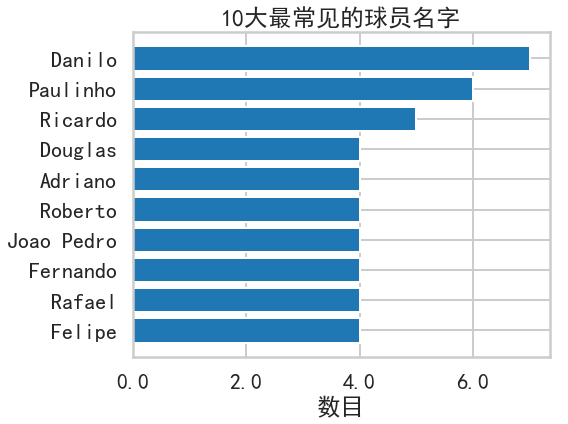

In [22]:
# Top counts number
top_num = 10

# get top counts name table
top_counts_name = player.groupby('player_name',as_index=False).count().sort_values('player_api_id',ascending=False).head(top_num)

# Make a barhplot
fig, ax = plt.subplots(figsize=(8,6))

ax.barh(np.arange(top_num), top_counts_name['player_api_id'].values, align = 'center')

# Set x&y label, ticklabel and their size
ax.set_yticks(np.arange(top_num))
ax.set_yticklabels(top_counts_name['player_name'].values)
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticks())
ax.set_xlabel('数目')
ax.set_title('{}大最常见的球员名字'.format(top_num))

plt.tight_layout()

其中叫Danilo（达尼诺）的球员最多，一共有7位；叫Paulinho（保利尼奥）的排第二，一共有6位；叫Ricardo（里卡多）的排第三。

#### 4.3 球员生日
出生日期为1989年3月2日的球员最多，有10名球员。

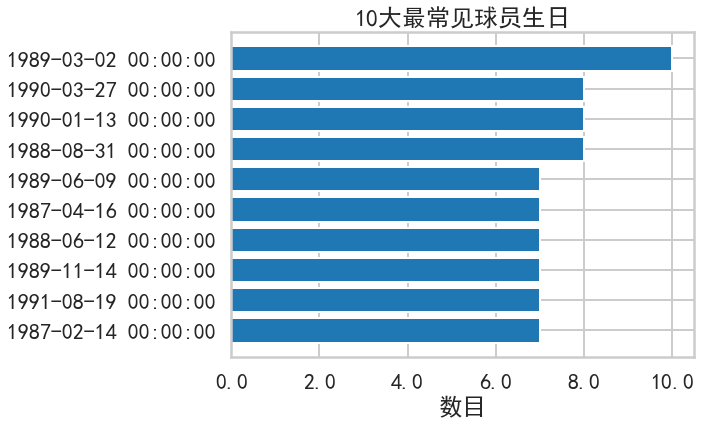

In [24]:
# Top counts number
top_num = 10

# get top counts name table
top_counts_birthday = player.groupby('birthday',as_index=False).count().sort_values('player_api_id',ascending=False).head(top_num)

# Make a barhplot
fig, ax = plt.subplots(figsize=(10,6))

ax.barh(np.arange(top_num), top_counts_birthday['player_api_id'].values, align = 'center')

# Set x&y label, ticklabel and their size
ax.set_yticks(np.arange(top_num))
ax.set_yticklabels(top_counts_birthday['birthday'].values)
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticks())
ax.set_xlabel('数目')
ax.set_title('{}大最常见球员生日'.format(top_num))

plt.tight_layout()

#### 4.3.1 出生月份偏见

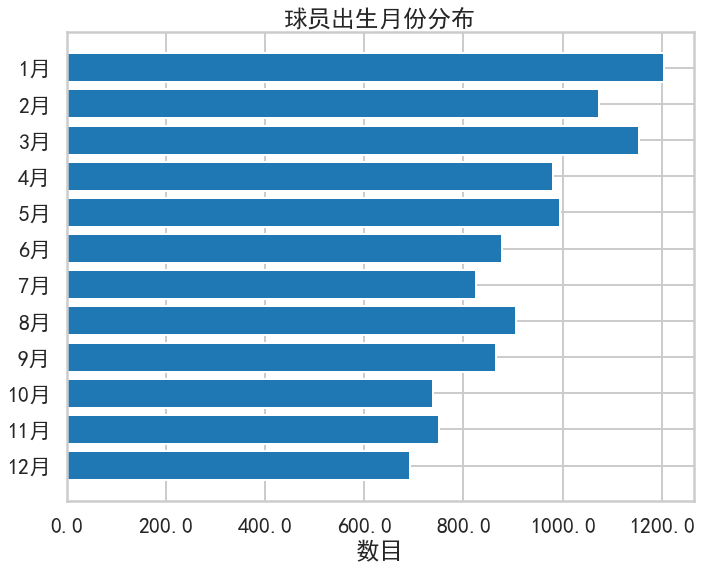

In [29]:
player['birthday'] = pd.to_datetime(player['birthday'], yearfirst=True)
player['month'] = [i.month for i in player['birthday']]

month_name = ['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月']

month_gby = player.groupby(by='month', as_index=False).count()

# Make a barhplot
fig, ax = plt.subplots(figsize=(10,8))

ax.barh(month_gby['month'], month_gby['birthday'], align = 'center')

# Set x&y label, ticklabel and their size
ax.set_yticks(month_gby['month'])
ax.set_yticklabels(month_name)
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticks())
ax.set_xlabel('数目')
ax.set_title('球员出生月份分布'.format(top_num))

plt.tight_layout()

这一结果验证了[出生月份偏见](https://en.wikipedia.org/wiki/Relative_age_effect)。青年体育比赛通常以年为单位，把球员划分成不同的年龄段。但是即使是在同一个年龄段中，最小的球员和最大的球员也有可能相差接近1岁。因此，年龄较大的球员在同年龄段中会获得身体上的优势，从而获得更多的比赛机会，最后成长为职业球员。而年龄较小的球员会因为身体上的劣势导致比赛机会较少，从而更难脱颖而出。这样产生的结果是在职业球员中某些月份出生的球员更多，而其他月份出生的较少。

比如在国际足球中，通常以1月1日来划分年龄段，因此1月份出生的小孩在同年龄段中属于年龄较大的球员，更有可能成长为职业球员。而十二月份出生的球员在同年龄段中属于年龄较小的球员，因此成长道路更为艰辛。这样的结果就造成了在职业球员中一月份出生的球员最多，十二月份出生的球员最少，如上面的数据统计所示。这就造成了表明上的球员出生月份偏见：如果不对上述数据统计做仔细研究，人们会误以为1月份出生的小孩更适合于踢球才导致了1月份出生的球员多。这其实是一种选择偏见。


另外，不同的划分日期会导致不同的出生月份偏见。比如，在英国是以9月1日来划分年龄段，因此造成的月份偏见就不一样（参见[The Science of Soccer](https://www.amazon.com/Science-Soccer-John-Wesson/dp/0750308133)）。

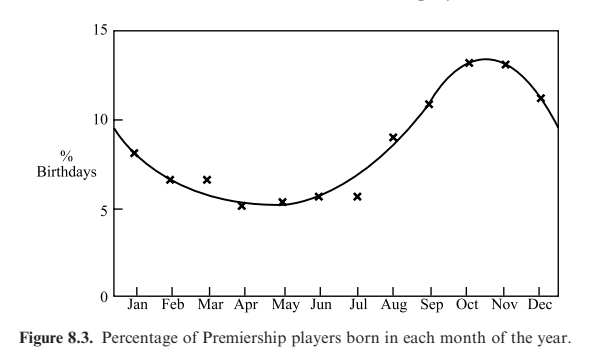

#### 4.4 球员身高
球员身高符合高斯分布。最矮的球员叫做Juan Quero，身高为157.5cm。由维基百科信息信息，Juan Quero是名西班牙球员，最早还出道于皇马青训，但职业生涯并不太成功，只在2008-2009赛季代表努马西亚出战过西甲。

最高的球员叫做Kristof van Hout，身高为208.3cm。由维基百科信息，Kristof van Hout是一名比利时门将。

欧洲职业足球联赛球员的平均身高为181.9cm。

欧洲职业球员平均身高为1.82米。
最矮的球员是Juan Quero，他的身高为1.57米。
最高的球员是Kristof van Hout，他的身高为2.08米。


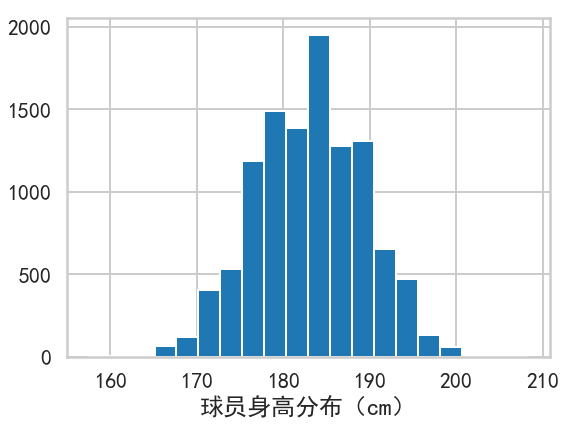

In [62]:
plt.figure(figsize=(8,6))
plt.hist(player['height'], bins=20)
plt.xlabel('球员身高分布（cm）')

print('欧洲职业球员平均身高为{:.2f}米。'.format(player['height'].mean()/100))
print('最矮的球员是{}，他的身高为{:.2f}米。'.format(player[player.height==np.min(player.height)].player_name.values[0],
                                                               np.min(player.height)/100))
print('最高的球员是{}，他的身高为{:.2f}米。'.format(player[player.height==np.max(player.height)].player_name.values[0],
                                                              np.max(player.height)/100))

plt.tight_layout()

#### 4.5 球员体重

球员体重也符合高斯分布。不出意外，最轻的球员是Juan Quero（53.1 kg），最重的球员是Kristof van Hout（110.2 kg）。

球员平均体重为76.4 kg。

欧洲职业球员的平均体重为168.4磅（76.4公斤）。
最轻的球员是Juan Quero，他的体重为117.0磅（53.1公斤）。
最重的球员是Kristof van Hout，他的体重为243.0磅（110.2）公斤。


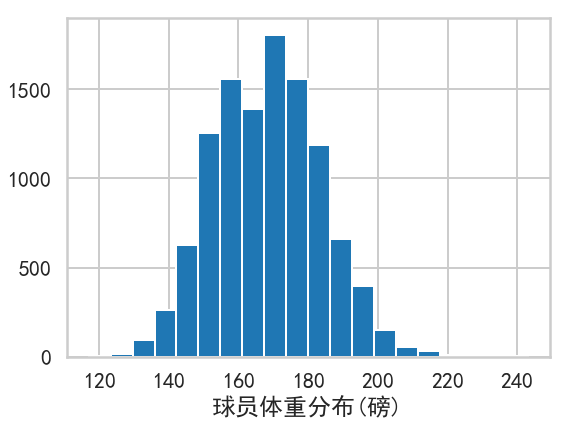

In [61]:
plt.figure(figsize=(8,6))
plt.hist(player['weight'], bins=20)
plt.xlabel('球员体重分布(磅)')

print('欧洲职业球员的平均体重为{:.1f}磅（{:.1f}公斤）。'.format(player['weight'].mean(), player['weight'].mean()*0.4536))
print('最轻的球员是{}，他的体重为{:.1f}磅（{:.1f}公斤）。'.format(player[player.weight==np.min(player.weight)].player_name.values[0],
                                                                   np.min(player.weight), np.min(player.weight)*0.4536))
print('最重的球员是{}，他的体重为{:.1f}磅（{:.1f}）公斤。'.format(player[player.weight==np.max(player.weight)].player_name.values[0],
                                                              np.max(player.weight), np.max(player.weight)*0.4536))

plt.tight_layout()
#plt.savefig('weight',dpi=400)